In [1]:
import pandas as pd

utterance_multilabel = pd.read_csv("/content/drive/MyDrive/자연어처리_시험대체/output/emotion_df.csv")
df = pd.read_csv("/content/drive/MyDrive/자연어처리_시험대체/data/상담데이터/우울증_df/consult_text.csv")

In [2]:
display(utterance_multilabel.head())
display(df.head())

,utterance_id,sentence_labels,sentence_scores,model_input_text,utterance_labels,utterance_multihot,utterance_label_names,id,age,gender,...,intensifiers_ratio_eojeol,intensifiers_ratio_morphs,single_cause_blame_count,single_cause_blame_ratio_eojeol,single_cause_blame_ratio_morphs,demandingness_count,demandingness_ratio_eojeol,demandingness_ratio_morphs,emotion_top1,emotion_top1_score
0,0,[10],[0.9981536269187927],안녕하세요.,[10],[0 0 0 0 0 0 0 0 0 0 1],['비인지왜곡'],D075,45,남,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LABEL_24,0.292347
1,1,[10],[0.9908612966537476],네.,[10],[0 0 0 0 0 0 0 0 0 0 1],['비인지왜곡'],D075,45,남,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LABEL_24,0.275943
2,2,[10],[0.9982078075408936],반갑습니다.,[10],[0 0 0 0 0 0 0 0 0 0 1],['비인지왜곡'],D075,45,남,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LABEL_42,0.129774
3,3,[2],[0.9671046733856201],시간대랑 그것 외에는.,[2],[0 0 1 0 0 0 0 0 0 0 0],['정신적 여과'],D075,45,남,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LABEL_24,0.127003
4,4,[10],[0.9908612966537476],네.,[10],[0 0 0 0 0 0 0 0 0 0 1],['비인지왜곡'],D075,45,남,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LABEL_24,0.275943


,id,age,gender,depression,anxiety,addiction,class,summary,silence,total_time,text,counseling_session
0,D075,45,남,2,0,0,DEPRESSION,주요 증상: 내담자는 이혼 후 주변 사람들에게 자신의 상황을 털어놓지 못하고 혼자서...,208.57,4098,안녕하세요.,1
1,D075,45,남,2,0,0,DEPRESSION,주요 증상: 내담자는 이혼 후 주변 사람들에게 자신의 상황을 털어놓지 못하고 혼자서...,208.57,4098,네.,1
2,D075,45,남,2,0,0,DEPRESSION,주요 증상: 내담자는 이혼 후 주변 사람들에게 자신의 상황을 털어놓지 못하고 혼자서...,208.57,4098,반갑습니다.,1
3,D075,45,남,2,0,0,DEPRESSION,주요 증상: 내담자는 이혼 후 주변 사람들에게 자신의 상황을 털어놓지 못하고 혼자서...,208.57,4098,시간대랑 그것 외에는.,1
4,D075,45,남,2,0,0,DEPRESSION,주요 증상: 내담자는 이혼 후 주변 사람들에게 자신의 상황을 털어놓지 못하고 혼자서...,208.57,4098,네.,1


# utterance_id 기준으로 두 DF 조인

In [3]:
# utterance_id 기준으로 두 DF 조인
# 안전하게 인덱스 복구
df_with_uid = df.reset_index().rename(columns={"index": "utterance_id"})

merged = utterance_multilabel.merge(
    df_with_uid,
    on="utterance_id",
    how="left",
    suffixes=("", "_df")   # 같은 컬럼명 충돌 시 접미사
)
merged = merged.rename(columns={
    "text_ml": "model_input_text"
})



In [4]:
merged.head()


,utterance_id,sentence_labels,sentence_scores,model_input_text,utterance_labels,utterance_multihot,utterance_label_names,id,age,gender,...,gender_df,depression_df,anxiety_df,addiction_df,class_df,summary_df,silence_df,total_time_df,text_df,counseling_session_df
0,0,[10],[0.9981536269187927],안녕하세요.,[10],[0 0 0 0 0 0 0 0 0 0 1],['비인지왜곡'],D075,45,남,...,남,2,0,0,DEPRESSION,주요 증상: 내담자는 이혼 후 주변 사람들에게 자신의 상황을 털어놓지 못하고 혼자서...,208.57,4098,안녕하세요.,1
1,1,[10],[0.9908612966537476],네.,[10],[0 0 0 0 0 0 0 0 0 0 1],['비인지왜곡'],D075,45,남,...,남,2,0,0,DEPRESSION,주요 증상: 내담자는 이혼 후 주변 사람들에게 자신의 상황을 털어놓지 못하고 혼자서...,208.57,4098,네.,1
2,2,[10],[0.9982078075408936],반갑습니다.,[10],[0 0 0 0 0 0 0 0 0 0 1],['비인지왜곡'],D075,45,남,...,남,2,0,0,DEPRESSION,주요 증상: 내담자는 이혼 후 주변 사람들에게 자신의 상황을 털어놓지 못하고 혼자서...,208.57,4098,반갑습니다.,1
3,3,[2],[0.9671046733856201],시간대랑 그것 외에는.,[2],[0 0 1 0 0 0 0 0 0 0 0],['정신적 여과'],D075,45,남,...,남,2,0,0,DEPRESSION,주요 증상: 내담자는 이혼 후 주변 사람들에게 자신의 상황을 털어놓지 못하고 혼자서...,208.57,4098,시간대랑 그것 외에는.,1
4,4,[10],[0.9908612966537476],네.,[10],[0 0 0 0 0 0 0 0 0 0 1],['비인지왜곡'],D075,45,남,...,남,2,0,0,DEPRESSION,주요 증상: 내담자는 이혼 후 주변 사람들에게 자신의 상황을 털어놓지 못하고 혼자서...,208.57,4098,네.,1


In [5]:
save_path = "/content/drive/MyDrive/자연어처리_시험대체/output/utterance_joined_emotion.csv"
merged.to_csv(
    save_path,
    index=False,        # 인덱스 컬럼 저장 안 함
    encoding="utf-8-sig"  # 한글 안 깨지게 (중요)
)

print(f"저장 완료: {save_path}")

저장 완료: /content/drive/MyDrive/자연어처리_시험대체/output/utterance_joined_emotion.csv


In [6]:
import pandas as pd

save_path = "/content/drive/MyDrive/자연어처리_시험대체/output/utterance_joined_emotion.csv"

merged = pd.read_csv(save_path)

# 시계열 분석을 위한 1차 정리

In [7]:
merged.head()

,utterance_id,sentence_labels,sentence_scores,model_input_text,utterance_labels,utterance_multihot,utterance_label_names,id,age,gender,...,gender_df,depression_df,anxiety_df,addiction_df,class_df,summary_df,silence_df,total_time_df,text_df,counseling_session_df
0,0,[10],[0.9981536269187927],안녕하세요.,[10],[0 0 0 0 0 0 0 0 0 0 1],['비인지왜곡'],D075,45,남,...,남,2,0,0,DEPRESSION,주요 증상: 내담자는 이혼 후 주변 사람들에게 자신의 상황을 털어놓지 못하고 혼자서...,208.57,4098,안녕하세요.,1
1,1,[10],[0.9908612966537476],네.,[10],[0 0 0 0 0 0 0 0 0 0 1],['비인지왜곡'],D075,45,남,...,남,2,0,0,DEPRESSION,주요 증상: 내담자는 이혼 후 주변 사람들에게 자신의 상황을 털어놓지 못하고 혼자서...,208.57,4098,네.,1
2,2,[10],[0.9982078075408936],반갑습니다.,[10],[0 0 0 0 0 0 0 0 0 0 1],['비인지왜곡'],D075,45,남,...,남,2,0,0,DEPRESSION,주요 증상: 내담자는 이혼 후 주변 사람들에게 자신의 상황을 털어놓지 못하고 혼자서...,208.57,4098,반갑습니다.,1
3,3,[2],[0.9671046733856201],시간대랑 그것 외에는.,[2],[0 0 1 0 0 0 0 0 0 0 0],['정신적 여과'],D075,45,남,...,남,2,0,0,DEPRESSION,주요 증상: 내담자는 이혼 후 주변 사람들에게 자신의 상황을 털어놓지 못하고 혼자서...,208.57,4098,시간대랑 그것 외에는.,1
4,4,[10],[0.9908612966537476],네.,[10],[0 0 0 0 0 0 0 0 0 0 1],['비인지왜곡'],D075,45,남,...,남,2,0,0,DEPRESSION,주요 증상: 내담자는 이혼 후 주변 사람들에게 자신의 상황을 털어놓지 못하고 혼자서...,208.57,4098,네.,1


In [8]:
label2id = { "이분법적 사고": 0, "과잉일반화": 1, "정신적 여과": 2, "긍정 무시": 3, "성급한 결론": 4, "과장 및 축소": 5, "감정적 추론": 6, "당위적 사고": 7, "개인화": 8, "낙인찍기": 9, "비인지왜곡": 10 }

In [9]:
# 발언별 “왜곡 개수”

merged["num_distortions"] = merged["utterance_labels"].apply(
    lambda x: 0 if x == [label2id["비인지왜곡"]] else len(x)
)

# 발언 순서 보장
merged = merged.sort_values(
    ["id", "counseling_session", "utterance_id"]
)

# 데이터 시각화

In [10]:
!apt-get update -qq
!apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.font_manager as fm
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings(action='ignore')

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family="NanumGothic")


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 3 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped direc

# 전체 내담자 데이터시각화

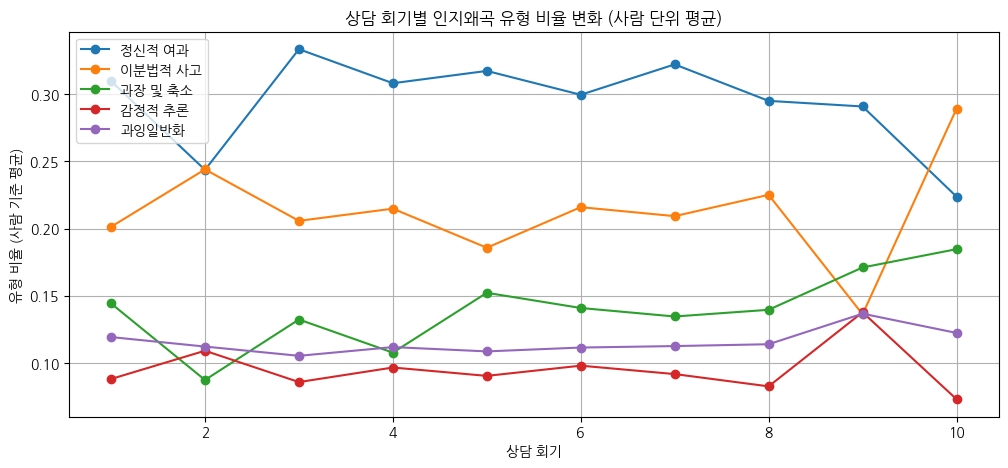

In [11]:
# ===============================
# 사람 기준 → 회기별 인지왜곡 유형 비율 분석 (정석 버전)
# ONE CELL
# ===============================

import pandas as pd
import matplotlib.pyplot as plt
import ast

# ---------- 0. 라벨 파싱 ----------
def parse_label_names(x):
    if isinstance(x, list):
        return x
    if isinstance(x, str):
        try:
            return ast.literal_eval(x)
        except Exception:
            return []
    return []

merged["label_list"] = merged["utterance_label_names"].apply(parse_label_names)

# 단일 라벨 (현재 데이터 구조상 1개)
merged["distortion_label"] = merged["label_list"].apply(
    lambda x: x[0] if len(x) > 0 else None
)

# 비인지왜곡 제거
df_cd = merged[merged["distortion_label"] != "비인지왜곡"].copy()

# ===============================
# 1️⃣ 사람 × 회기 × 유형별 비율 계산
# ===============================

# (id, 회기, 유형)별 발화 수
cnt = (
    df_cd
    .groupby(["id", "counseling_session", "distortion_label"])
    .size()
    .reset_index(name="cnt")
)

# (id, 회기)별 전체 인지왜곡 발화 수
total = (
    cnt
    .groupby(["id", "counseling_session"])["cnt"]
    .sum()
    .reset_index(name="total")
)

# 비율 계산
ratio = cnt.merge(total, on=["id", "counseling_session"])
ratio["ratio"] = ratio["cnt"] / ratio["total"]

# ===============================
# 2️⃣ 회기별 집단 평균 비율 (사람 기준 평균)
# ===============================

group_mean = (
    ratio
    .groupby(["counseling_session", "distortion_label"])["ratio"]
    .mean()
    .reset_index()
)

# ===============================
# 3️⃣ 시각화: 회기별 유형 평균 비율 (라인)
# ===============================

top_labels = (
    ratio["distortion_label"]
    .value_counts()
    .head(5)
    .index
)

plot_df = group_mean[group_mean["distortion_label"].isin(top_labels)]

plt.figure(figsize=(12, 5))
for label in top_labels:
    tmp = plot_df[plot_df["distortion_label"] == label]
    plt.plot(
        tmp["counseling_session"],
        tmp["ratio"],
        marker="o",
        label=label
    )

plt.xlabel("상담 회기")
plt.ylabel("유형 비율 (사람 기준 평균)")
plt.title("상담 회기별 인지왜곡 유형 비율 변화 (사람 단위 평균)")
plt.legend()
plt.grid(True)
plt.show()


In [12]:
# ===============================
# 회기 초기 vs 후기 인지왜곡 유형 변화 통계검정
# 사람 기준 / Wilcoxon signed-rank test
# ===============================

import pandas as pd
import ast
from scipy.stats import wilcoxon

# ---------- 0. 라벨 파싱 ----------
def parse_label_names(x):
    if isinstance(x, list):
        return x
    if isinstance(x, str):
        try:
            return ast.literal_eval(x)
        except Exception:
            return []
    return []

merged["label_list"] = merged["utterance_label_names"].apply(parse_label_names)
merged["distortion_label"] = merged["label_list"].apply(
    lambda x: x[0] if len(x) > 0 else None
)

# 비인지왜곡 제외
df_cd = merged[merged["distortion_label"] != "비인지왜곡"].copy()

# ---------- 1. 사람 × 회기 × 유형 비율 ----------
cnt = (
    df_cd
    .groupby(["id", "counseling_session", "distortion_label"])
    .size()
    .reset_index(name="cnt")
)

total = (
    cnt
    .groupby(["id", "counseling_session"])["cnt"]
    .sum()
    .reset_index(name="total")
)

ratio = cnt.merge(total, on=["id", "counseling_session"])
ratio["ratio"] = ratio["cnt"] / ratio["total"]

# ---------- 2. 개인별 초기 / 후기 회기 추출 ----------
first_last = (
    ratio
    .groupby("id")["counseling_session"]
    .agg(first="min", last="max")
    .reset_index()
)

ratio = ratio.merge(first_last, on="id")

ratio["phase"] = ratio.apply(
    lambda r: "early" if r["counseling_session"] == r["first"]
    else ("late" if r["counseling_session"] == r["last"] else None),
    axis=1
)

phase_df = ratio[ratio["phase"].isin(["early", "late"])]

# ---------- 3. 유형별 Wilcoxon 검정 ----------
results = []

for label in phase_df["distortion_label"].unique():
    tmp = phase_df[phase_df["distortion_label"] == label]

    pivot = (
        tmp
        .pivot_table(
            index="id",
            columns="phase",
            values="ratio",
            aggfunc="mean"
        )
        .dropna()
    )

    # 표본이 너무 적으면 스킵
    if len(pivot) < 5:
        continue

    stat, p = wilcoxon(pivot["early"], pivot["late"])

    results.append({
        "distortion_label": label,
        "n_subjects": len(pivot),
        "early_mean": pivot["early"].mean(),
        "late_mean": pivot["late"].mean(),
        "p_value": p
    })

results_df = pd.DataFrame(results).sort_values("p_value")

results_df


,distortion_label,n_subjects,early_mean,late_mean,p_value
8,이분법적 사고,55,0.198705,0.232978,0.055023
1,개인화,41,0.059200,0.047324,0.069589
7,성급한 결론,11,0.026236,0.036643,0.083008
9,정신적 여과,56,0.313095,0.285325,0.148794
0,감정적 추론,51,0.087167,0.080169,0.542342
6,당위적 사고,27,0.040643,0.052567,0.594397
3,과장 및 축소,53,0.144094,0.141453,0.623194
4,긍정 무시,43,0.048761,0.051671,0.688768
2,과잉일반화,55,0.116780,0.113551,0.743847
5,낙인찍기,17,0.024608,0.025800,0.853638


⬆ 상담 초기와 후기 간 인지왜곡 유형 비율을 비교한 결과,
전반적으로 통계적으로 유의한 변화는 관찰되지 않았으나,
이분법적 사고와 개인화 유형에서 경계적 변화 양상이 확인되었다.

In [13]:
!pip install tableone


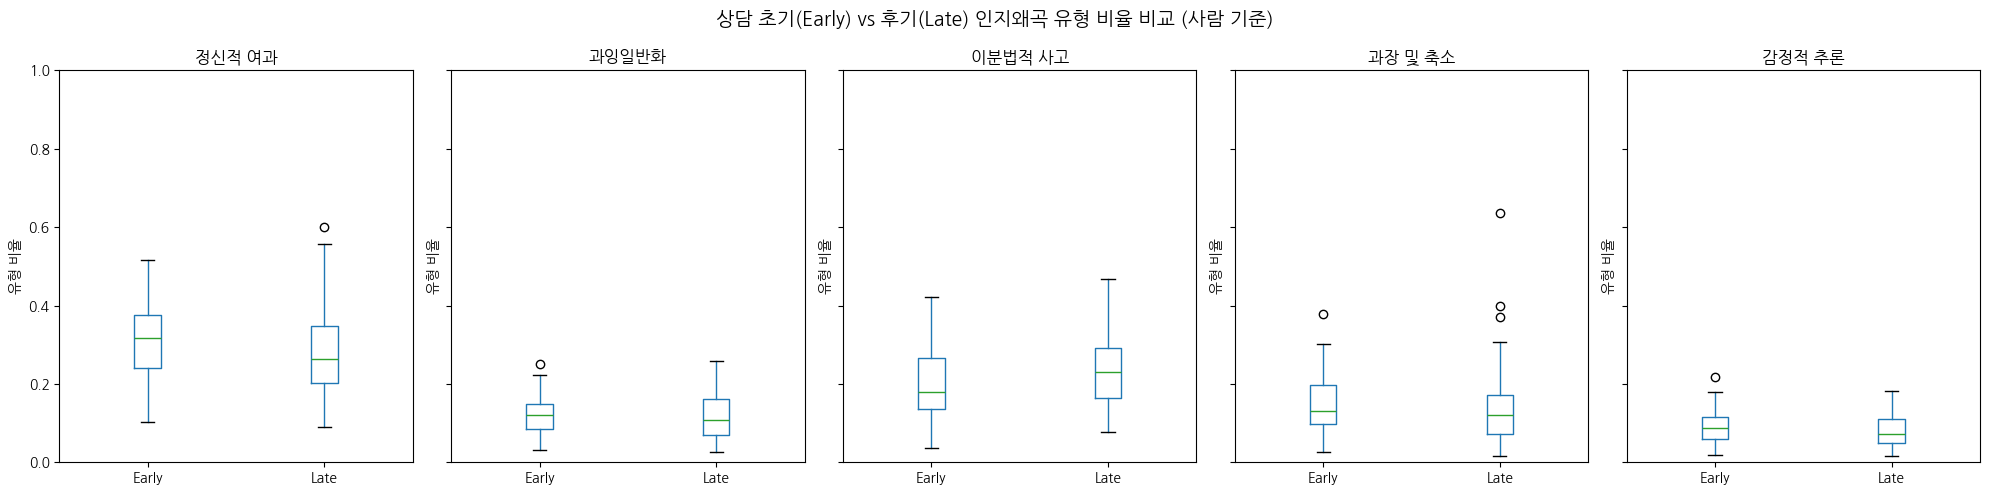

In [14]:
# ===============================
# Early vs Late 인지왜곡 유형 Boxplot 시각화
# 사람 기준 / ONE CELL
# ===============================

import pandas as pd
import matplotlib.pyplot as plt
import ast

# ---------- 0. 라벨 파싱 ----------
def parse_label_names(x):
    if isinstance(x, list):
        return x
    if isinstance(x, str):
        try:
            return ast.literal_eval(x)
        except Exception:
            return []
    return []

merged["label_list"] = merged["utterance_label_names"].apply(parse_label_names)
merged["distortion_label"] = merged["label_list"].apply(
    lambda x: x[0] if len(x) > 0 else None
)

# 비인지왜곡 제외
df_cd = merged[merged["distortion_label"] != "비인지왜곡"].copy()

# ---------- 1. 사람 × 회기 × 유형 비율 ----------
cnt = (
    df_cd
    .groupby(["id", "counseling_session", "distortion_label"])
    .size()
    .reset_index(name="cnt")
)

total = (
    cnt
    .groupby(["id", "counseling_session"])["cnt"]
    .sum()
    .reset_index(name="total")
)

ratio = cnt.merge(total, on=["id", "counseling_session"])
ratio["ratio"] = ratio["cnt"] / ratio["total"]

# ---------- 2. 개인별 Early / Late 회기 ----------
first_last = (
    ratio
    .groupby("id")["counseling_session"]
    .agg(first="min", last="max")
    .reset_index()
)

ratio = ratio.merge(first_last, on="id")

ratio["phase"] = ratio.apply(
    lambda r: "Early" if r["counseling_session"] == r["first"]
    else ("Late" if r["counseling_session"] == r["last"] else None),
    axis=1
)

phase_df = ratio[ratio["phase"].isin(["Early", "Late"])]

# ---------- 3. 시각화 대상 유형 선택 (상위 5개) ----------
top_labels = (
    phase_df["distortion_label"]
    .value_counts()
    .head(5)
    .index
)

plot_df = phase_df[phase_df["distortion_label"].isin(top_labels)]

# ---------- 4. Boxplot ----------
fig, axes = plt.subplots(1, len(top_labels), figsize=(4 * len(top_labels), 5), sharey=True)

if len(top_labels) == 1:
    axes = [axes]

for ax, label in zip(axes, top_labels):
    tmp = plot_df[plot_df["distortion_label"] == label]

    tmp.boxplot(
        column="ratio",
        by="phase",
        ax=ax,
        grid=False
    )
    ax.set_title(label)
    ax.set_xlabel("")
    ax.set_ylabel("유형 비율")
    ax.set_ylim(0, 1)

plt.suptitle("상담 초기(Early) vs 후기(Late) 인지왜곡 유형 비율 비교 (사람 기준)", fontsize=14)
plt.tight_layout()
plt.show()


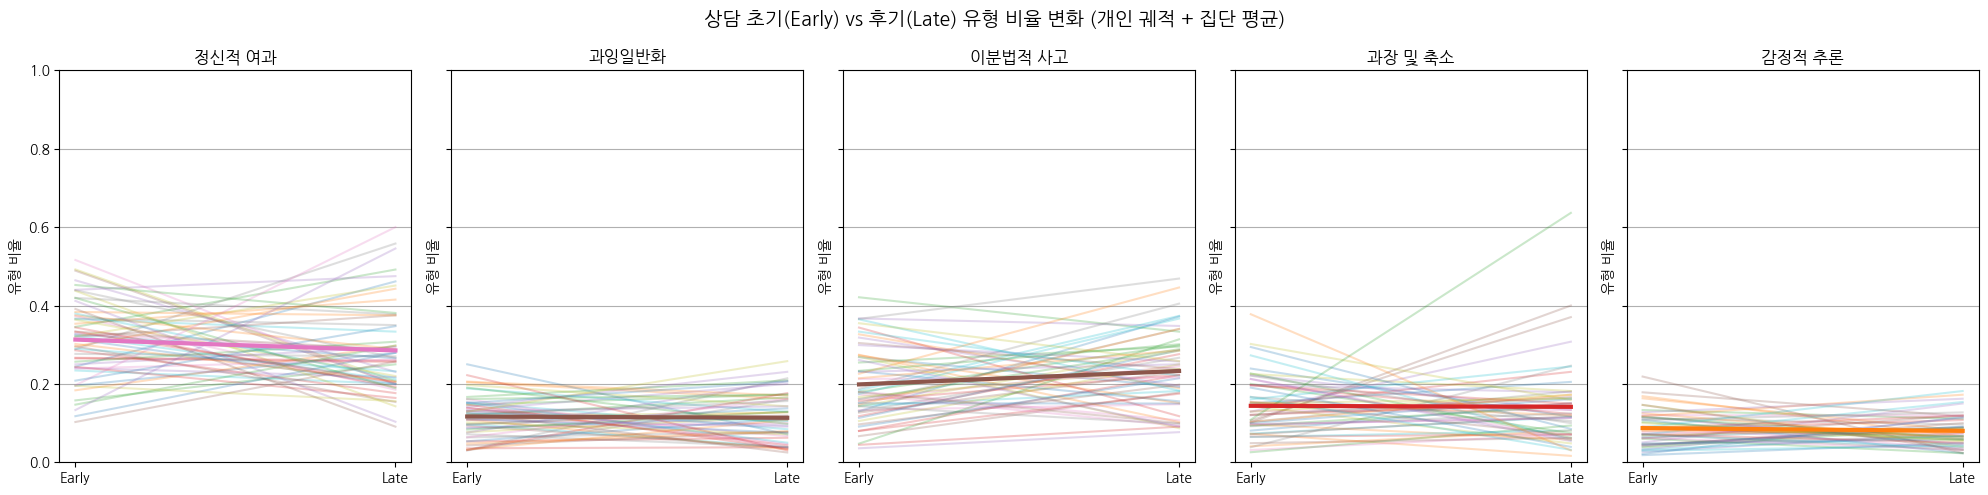

In [15]:
# ===============================
# Early vs Late Paired Line Plot (개인 궤적 + 집단 평균)
# 사람 기준 비율 / ONE CELL
# ===============================

import pandas as pd
import matplotlib.pyplot as plt
import ast

# ---------- 0. 라벨 파싱 ----------
def parse_label_names(x):
    if isinstance(x, list):
        return x
    if isinstance(x, str):
        try:
            return ast.literal_eval(x)
        except Exception:
            return []
    return []

merged["label_list"] = merged["utterance_label_names"].apply(parse_label_names)
merged["distortion_label"] = merged["label_list"].apply(
    lambda x: x[0] if len(x) > 0 else None
)

# 비인지왜곡 제외
df_cd = merged[merged["distortion_label"] != "비인지왜곡"].copy()

# ---------- 1. 사람 × 회기 × 유형 비율 ----------
cnt = (
    df_cd
    .groupby(["id", "counseling_session", "distortion_label"])
    .size()
    .reset_index(name="cnt")
)

total = (
    cnt
    .groupby(["id", "counseling_session"])["cnt"]
    .sum()
    .reset_index(name="total")
)

ratio = cnt.merge(total, on=["id", "counseling_session"])
ratio["ratio"] = ratio["cnt"] / ratio["total"]

# ---------- 2. 개인별 Early / Late 회기 ----------
first_last = (
    ratio
    .groupby("id")["counseling_session"]
    .agg(first="min", last="max")
    .reset_index()
)

ratio = ratio.merge(first_last, on="id")

ratio["phase"] = ratio.apply(
    lambda r: "Early" if r["counseling_session"] == r["first"]
    else ("Late" if r["counseling_session"] == r["last"] else None),
    axis=1
)

phase_df = ratio[ratio["phase"].isin(["Early", "Late"])]

# ---------- 3. 시각화 대상 유형 선택 (상위 5개) ----------
top_labels = (
    phase_df["distortion_label"]
    .value_counts()
    .head(5)
    .index
)

plot_df = phase_df[phase_df["distortion_label"].isin(top_labels)]

# ---------- 4. Paired line plot ----------
fig, axes = plt.subplots(1, len(top_labels), figsize=(4 * len(top_labels), 5), sharey=True)
if len(top_labels) == 1:
    axes = [axes]

x_map = {"Early": 0, "Late": 1}
x_ticks = [0, 1]
x_labels = ["Early", "Late"]

for ax, label in zip(axes, top_labels):
    tmp = plot_df[plot_df["distortion_label"] == label]

    wide = (
        tmp.pivot_table(index="id", columns="phase", values="ratio", aggfunc="mean")
        .dropna()
    )

    # 개인별 선 (얇게)
    for _, row in wide.iterrows():
        ax.plot([0, 1], [row["Early"], row["Late"]], alpha=0.25)

    # 집단 평균 선 (굵게)
    mean_early = wide["Early"].mean()
    mean_late = wide["Late"].mean()
    ax.plot([0, 1], [mean_early, mean_late], linewidth=3)

    ax.set_title(label)
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_labels)
    ax.set_ylim(0, 1)
    ax.grid(True, axis="y")
    ax.set_ylabel("유형 비율")

plt.suptitle("상담 초기(Early) vs 후기(Late) 유형 비율 변화 (개인 궤적 + 집단 평균)", fontsize=14)
plt.tight_layout()
plt.show()


# Δ비율 vs depression/anxiety 상관

In [16]:
merged.columns

Index(['utterance_id', 'sentence_labels', 'sentence_scores',
       'model_input_text', 'utterance_labels', 'utterance_multihot',
       'utterance_label_names', 'id', 'age', 'gender', 'depression', 'anxiety',
       'addiction', 'class', 'summary', 'silence', 'total_time', 'text',
       'counseling_session', 'analysis_text', 'total_eojeol', 'total_morphs',
       'tense_time_expansion_count', 'tense_time_expansion_ratio_eojeol',
       'tense_time_expansion_ratio_morphs', 'sentence_certainty_count',
       'sentence_certainty_ratio_eojeol', 'sentence_certainty_ratio_morphs',
       'self_referential_count', 'self_referential_ratio_eojeol',
       'self_referential_ratio_morphs', 'negativity_bias_count',
       'negativity_bias_ratio_eojeol', 'negativity_bias_ratio_morphs',
       'absolute_all_or_nothing_count', 'absolute_all_or_nothing_ratio_eojeol',
       'absolute_all_or_nothing_ratio_morphs', 'dichotomous_scale_count',
       'dichotomous_scale_ratio_eojeol', 'dichotomous_scale_

In [17]:
# ===============================
# Δ(인지왜곡 유형 비율) vs depression / anxiety 상관분석
# 사람 기준 / ONE CELL
# ===============================

import pandas as pd
import ast
from scipy.stats import spearmanr

# ---------- 0. 라벨 파싱 ----------
def parse_label_names(x):
    if isinstance(x, list):
        return x
    if isinstance(x, str):
        try:
            return ast.literal_eval(x)
        except Exception:
            return []
    return []

merged["label_list"] = merged["utterance_label_names"].apply(parse_label_names)
merged["distortion_label"] = merged["label_list"].apply(
    lambda x: x[0] if len(x) > 0 else None
)

# 비인지왜곡 제외
df_cd = merged[merged["distortion_label"] != "비인지왜곡"].copy()

# ---------- 1. 사람 × 회기 × 유형 비율 ----------
cnt = (
    df_cd
    .groupby(["id", "counseling_session", "distortion_label"])
    .size()
    .reset_index(name="cnt")
)

total = (
    cnt
    .groupby(["id", "counseling_session"])["cnt"]
    .sum()
    .reset_index(name="total")
)

ratio = cnt.merge(total, on=["id", "counseling_session"])
ratio["ratio"] = ratio["cnt"] / ratio["total"]

# ---------- 2. Early / Late ----------
first_last = (
    ratio.groupby("id")["counseling_session"]
    .agg(first="min", last="max")
    .reset_index()
)

ratio = ratio.merge(first_last, on="id")

ratio["phase"] = ratio.apply(
    lambda r: "Early" if r["counseling_session"] == r["first"]
    else ("Late" if r["counseling_session"] == r["last"] else None),
    axis=1
)

phase_df = ratio[ratio["phase"].isin(["Early", "Late"])]

# ---------- 3. Δ 비율 계산 ----------
wide = (
    phase_df
    .pivot_table(
        index=["id", "distortion_label"],
        columns="phase",
        values="ratio",
        aggfunc="mean"
    )
    .dropna()
    .reset_index()
)

wide["delta_ratio"] = wide["Late"] - wide["Early"]

# ---------- 4. 임상 점수 병합 ----------
clinical = (
    merged
    .groupby("id")[["depression", "anxiety"]]
    .first()
    .reset_index()
)

wide = wide.merge(clinical, on="id")

# ---------- 5. Spearman 상관분석 ----------
results = []

for label in wide["distortion_label"].unique():
    tmp = wide[wide["distortion_label"] == label]

    if len(tmp) < 10:
        continue

    rho_dep, p_dep = spearmanr(tmp["delta_ratio"], tmp["depression"])
    rho_anx, p_anx = spearmanr(tmp["delta_ratio"], tmp["anxiety"])

    results.append({
        "distortion_label": label,
        "n_subjects": len(tmp),
        "rho_delta_vs_depression": round(rho_dep, 3),
        "p_depression": round(p_dep, 4),
        "rho_delta_vs_anxiety": round(rho_anx, 3),
        "p_anxiety": round(p_anx, 4)
    })

corr_df = pd.DataFrame(results).sort_values("p_depression")
corr_df


,distortion_label,n_subjects,rho_delta_vs_depression,p_depression,rho_delta_vs_anxiety,p_anxiety
2,과장 및 축소,53,0.202,0.1465,NaN,NaN
5,이분법적 사고,55,-0.172,0.2094,NaN,NaN
4,성급한 결론,11,0.346,0.2967,NaN,NaN
0,감정적 추론,51,-0.116,0.4195,NaN,NaN
6,정신적 여과,56,0.103,0.4485,NaN,NaN
8,개인화,41,0.097,0.5463,NaN,NaN
3,긍정 무시,43,0.077,0.6243,NaN,NaN
1,과잉일반화,55,-0.032,0.8140,NaN,NaN
7,낙인찍기,17,-0.061,0.8172,NaN,NaN
9,당위적 사고,27,-0.026,0.8980,NaN,NaN


⬆ 인지왜곡 유형 비율의 변화량과 우울 점수 간의 상관을 분석한 결과,
통계적으로 유의한 상관은 관찰되지 않았으나,
일부 유형에서 약한 방향성의 연관성이 탐색적으로 확인되었다.

In [18]:
# ===============================
# Δ(num_distortions) vs depression 상관분석
# 사람 기준 / ONE CELL
# ===============================

import pandas as pd
from scipy.stats import spearmanr

# ---------- 1. Early / Late 회기 정의 ----------
# 사람별 첫/마지막 회기
first_last = (
    merged
    .groupby("id")["counseling_session"]
    .agg(first="min", last="max")
    .reset_index()
)

df = merged.merge(first_last, on="id")

df["phase"] = df.apply(
    lambda r: "Early" if r["counseling_session"] == r["first"]
    else ("Late" if r["counseling_session"] == r["last"] else None),
    axis=1
)

phase_df = df[df["phase"].isin(["Early", "Late"])]

# ---------- 2. 사람 × phase 별 평균 왜곡 수 ----------
per_person = (
    phase_df
    .groupby(["id", "phase"])["num_distortions"]
    .mean()
    .unstack()
    .dropna()
)

# Δ = Late - Early
per_person["delta_num_distortions"] = per_person["Late"] - per_person["Early"]

# ---------- 3. depression 병합 ----------
depression = (
    merged
    .groupby("id")["depression"]
    .first()
)

analysis_df = per_person.merge(depression, left_index=True, right_index=True)

# ---------- 4. Spearman 상관 ----------
rho, p = spearmanr(
    analysis_df["delta_num_distortions"],
    analysis_df["depression"]
)

print(f"Spearman rho (Δnum_distortions vs depression): {rho:.3f}")
print(f"p-value: {p:.4f}")

analysis_df.head()


Spearman rho (Δnum_distortions vs depression): -0.051
p-value: 0.7089


,Early,Late,delta_num_distortions,depression
id,,,,
D001,3.974026,6.350000,2.375974,1
D002,6.597403,4.471698,-2.125704,2
D003,5.962025,3.793103,-2.168922,3
D004,4.081967,4.206897,0.124929,2
D005,4.486111,3.902439,-0.583672,1


⬆ 인지왜곡의 총 개수 변화량과 우울 점수 간의 상관을 분석한 결과,
두 변수 간 유의한 단조 관계는 관찰되지 않았다.
이는 인지왜곡의 양적 감소보다는,
인지 내용을 다루는 과정적 변화가 정서 개선과 더 밀접할 가능성을 시사한다.

In [19]:
# ===============================
# 3️⃣ 집계 분석
# ===============================

# 1. 언어 Feature 비율 컬럼만 추출
lang_ratio_cols = [
    c for c in df.columns
    if c.endswith("_ratio_eojeol") or c.endswith("_ratio_morphs")
]

# 2. counseling_session 단위 집계
session_lang_summary = (
    df.groupby("counseling_session")[lang_ratio_cols]
      .mean()
      .reset_index()
)

session_emotion_summary = (
    df.groupby("counseling_session")["emotion_top1_score"]
      .mean()
      .reset_index(name="mean_emotion_score")
)

# 3. 감정 분포 (Top-1 기준)
emotion_dist_by_session = (
    df.groupby(["counseling_session", "emotion_top1"])
      .size()
      .reset_index(name="count")
)

# 4. 예시: depression / anxiety / class 기준 집계
group_summary = (
    df.groupby(["class", "depression", "anxiety"])[
        lang_ratio_cols + ["emotion_top1_score"]
    ]
    .mean()
    .reset_index()
)

session_lang_summary.head(), session_emotion_summary.head()


(   counseling_session  tense_time_expansion_ratio_eojeol  \
 0                   1                           0.001982   
 1                   2                           0.002385   
 2                   3                           0.002249   
 3                   4                           0.001706   
 4                   5                           0.002382   
 
    tense_time_expansion_ratio_morphs  sentence_certainty_ratio_eojeol  \
 0                           0.001352                         0.001979   
 1                           0.001551                         0.003836   
 2                           0.001523                         0.002683   
 3                           0.001154                         0.002058   
 4                           0.001562                         0.002280   
 
    sentence_certainty_ratio_morphs  self_referential_ratio_eojeol  \
 0                         0.001267                       0.005845   
 1                         0.002355           

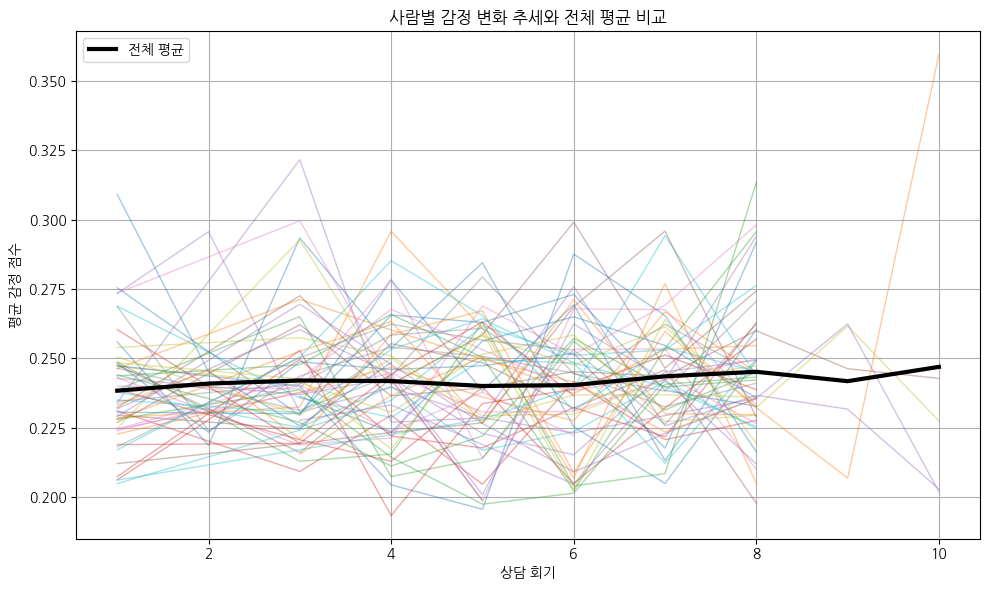

In [36]:
# ============================================================
# 사람(id)별 상담 회기 감정 변화 추세 시각화 (단일 셀)
# ============================================================

import matplotlib.pyplot as plt
import pandas as pd

# 전제: merged_emotion_summary에 ['id', 'counseling_session', 'mean_emotion_score'] 존재

# Calculate mean_emotion_score for each id and counseling_session from merged dataframe
merged_emotion_summary = merged.groupby(["id", "counseling_session"])["emotion_top1_score"].mean().reset_index(name="mean_emotion_score")

plt.figure(figsize=(10, 6))

# 1️⃣ 사람(id)별 개별 추세
for pid, sub_df in merged_emotion_summary.groupby("id"):
    sub_df = sub_df.sort_values("counseling_session")
    plt.plot(
        sub_df["counseling_session"],
        sub_df["mean_emotion_score"],
        alpha=0.4,
        linewidth=1
    )

# 2️⃣ 전체 평균 추세 (굵게)
mean_trend = (
    merged_emotion_summary
    .groupby("counseling_session")["mean_emotion_score"]
    .mean()
    .reset_index()
)

plt.plot(
    mean_trend["counseling_session"],
    mean_trend["mean_emotion_score"],
    color="black",
    linewidth=3,
    label="전체 평균"
)

plt.xlabel("상담 회기")
plt.ylabel("평균 감정 점수")
plt.title("사람별 감정 변화 추세와 전체 평균 비교")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

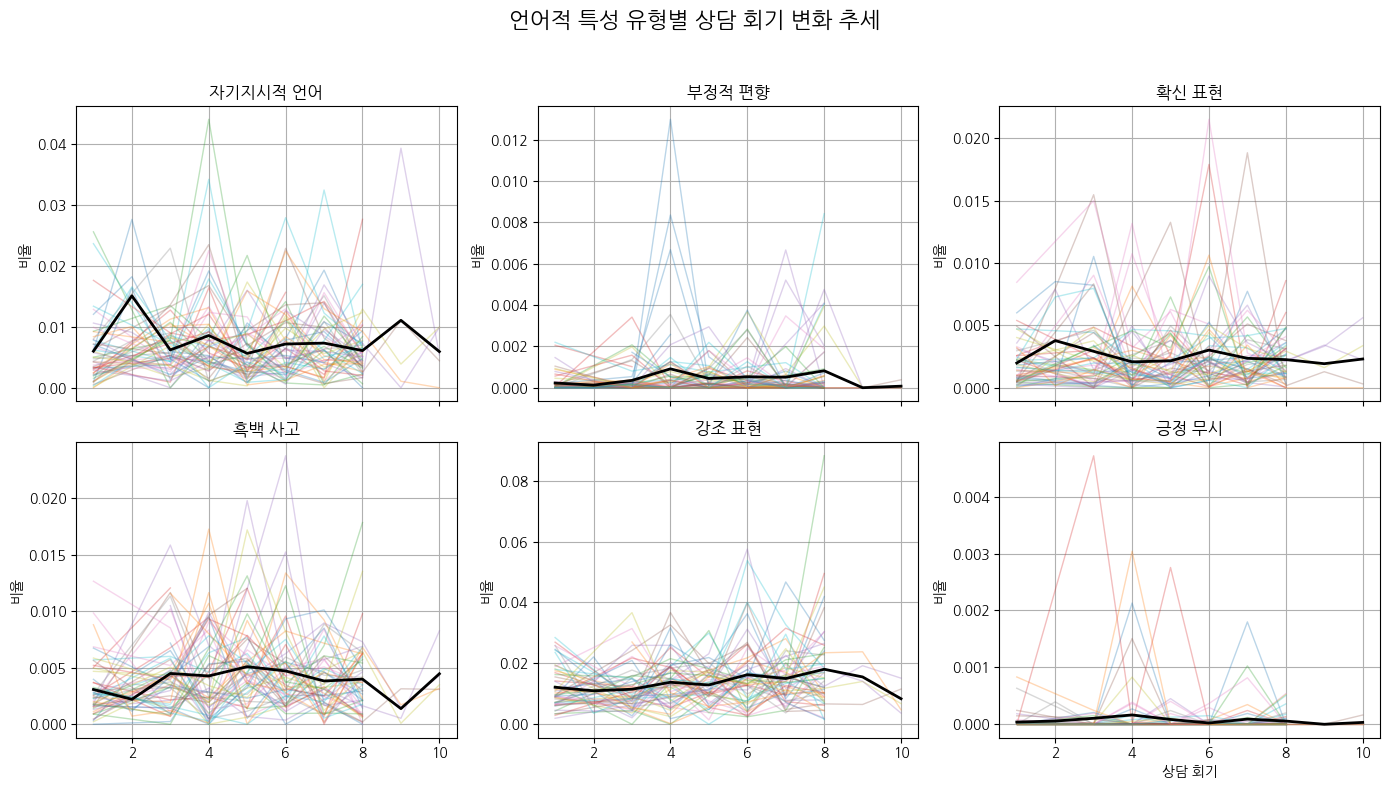

In [39]:
# ============================================================
# 언어적 특성 유형별 Small Multiples 추세 시각화 (단일 셀)
# ============================================================

import matplotlib.pyplot as plt
import pandas as pd
import math

# 📌 시각화할 언어적 특성 컬럼들
language_features = [
    "self_referential_ratio_eojeol",
    "negativity_bias_ratio_eojeol",
    "sentence_certainty_ratio_eojeol",
    "absolute_all_or_nothing_ratio_eojeol",
    "intensifiers_ratio_eojeol",
    "disqualify_positive_ratio_eojeol"
]

# 보기 좋은 한글 라벨 (선택)
feature_labels = {
    "self_referential_ratio_eojeol": "자기지시적 언어",
    "negativity_bias_ratio_eojeol": "부정적 편향",
    "sentence_certainty_ratio_eojeol": "확신 표현",
    "absolute_all_or_nothing_ratio_eojeol": "흑백 사고",
    "intensifiers_ratio_eojeol": "강조 표현",
    "disqualify_positive_ratio_eojeol": "긍정 무시"
}

# lang_df_agg 생성: merged DataFrame에서 id, counseling_session 별 언어 특징 평균 계산
lang_df_agg = merged.groupby(["id", "counseling_session"])[language_features].mean().reset_index()

n_features = len(language_features)
n_cols = 3
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4 * n_rows), sharex=True)
axes = axes.flatten()

for idx, feature in enumerate(language_features):
    ax = axes[idx]

    # 개인별 추세
    for pid, sub_df in lang_df_agg.groupby("id"):
        sub_df = sub_df.sort_values("counseling_session")
        ax.plot(
            sub_df["counseling_session"],
            sub_df[feature],
            alpha=0.3,
            linewidth=1
        )

    # 전체 평균
    mean_trend = (
        lang_df_agg
        .groupby("counseling_session")[feature]
        .mean()
        .reset_index()
    )

    ax.plot(
        mean_trend["counseling_session"],
        mean_trend[feature],
        color="black",
        linewidth=2
    )

    ax.set_title(feature_labels.get(feature, feature))
    ax.set_ylabel("비율")
    ax.grid(True)

# 남는 subplot 제거
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.xlabel("상담 회기")
plt.suptitle("언어적 특성 유형별 상담 회기 변화 추세", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()